# Book Dataset Analysis

A concise, insight-first exploration of a books dataset—covering inventory, authorship, categories, publication trends, and reader engagement. The notebook answers the following:

## Objectives (Clear Questions)
1. Total number of books.
2. Top 25 categories by book count.
3. Top 25 authors by number of books published.
4. Yearly trend in books published (earliest → latest).
5. Top 25 most common book titles.
6. Top 25 authors by total pages written.
7. Top 25 books by “want_to_read”.
8. Top 25 books by “currently_reading”.
9. Top 25 books by “have_read”.
10. Top 25 authors by “want_to_read”, “currently_reading”, and “have_read”.

---

## Data Preview (5 rows)

| title                                               | author                    | category      | publish_year             | reading_stats                                     |
|-----------------------------------------------------|---------------------------|---------------|--------------------------|---------------------------------------------------|
| Grasping the Changing World                         | Vaclav Hubinger           | anthropology  | First published in 2002  | 0 Want to read \| 0 Currently reading \| 0 Have read |
| Design Anthropology in Context                      | Adam Drazin               | anthropology  | First published in 2020  | 0 Want to read \| 0 Currently reading \| 0 Have read |
| Transculture, Société et Savoirs Dans les Amériques | Adina Balint              | anthropology  | First published in 2017  | 0 Want to read \| 0 Currently reading \| 0 Have read |
| Methods and Data Analysis for Cross-Cultural R...   | Fons J. R. van de Vijver  | anthropology  | First published in 2021  | 0 Want to read \| 0 Currently reading \| 0 Have read |
| Redefining Nature                                   | R. F. Ellen               | anthropology  | First published in 2021  | 0 Want to read \| 0 Currently reading \| 0 Have read |

---

### 1. Importing Libraries & Data Loading

In [181]:
# !git clone https://github.com/AshishJangra27/datasets

import os
import numpy as np
import pandas as pd
from tqdm.auto import tqdm

data = pd.DataFrame()

for file in tqdm(os.listdir('/content/datasets/OpenBook')):

  file_path = '/content/datasets/OpenBook/' + file
  df = pd.read_csv(file_path)
  data = pd.concat([data, df], ignore_index=True)

data.head()

  0%|          | 0/141 [00:00<?, ?it/s]

,title,author,category,publish_year,title_id,author_id,cover_url,book_stats,descriptions,reading_stats
0,"British Literature, 1640-1789",Robert Demaria,literature,First published in 1996,/works/OL8223625W?edition=ia%3Abritishliteratu...,/authors/OL2735177A/Robert_Demaria,//covers.openlibrary.org/b/olid/OL7609326M-M.jpg,Publish Date December 1996|Publisher Blackwel...,This edition doesn't have a description yet. C...,0 Want to read|1 Currently reading|0 Have read
1,Altes Reich und Neue Dichtung,Markus Hien,literature,First published in 2015,/works/OL21552602W,/authors/OL8244204A/Markus_Hien,//covers.openlibrary.org/b/olid/OL29241387M-M.jpg,"Publish Date 2015|Publisher De Gruyter, Inc.,...",This edition doesn't have a description yet. C...,0 Want to read|0 Currently reading|0 Have read
2,Deviant women,Tiina Mäntymäki,literature,First published in 2014,/works/OL23220400W,/authors/OL8802663A/Tiina_Mäntymäki,/images/icons/avatar_book-sm.png,Publish Date 2015|Publisher PL Academic Resea...,This edition doesn't have a description yet. C...,0 Want to read|0 Currently reading|0 Have read
3,Terry McMillan,Paulette Richards,literature,First published in 1999,/works/OL34382W?edition=ia%3Aterrymcmillancri0...,/authors/OL25028A/Paulette_Richards,//covers.openlibrary.org/b/olid/OL38705M-M.jpg,Publish Date 1999|Publisher Greenwood Press|L...,This edition doesn't have a description yet. C...,1 Want to read|0 Currently reading|0 Have read
4,Then & now,Floyd C. Watkins,literature,First published in 1982,/works/OL1313660W?edition=ia%3Athennowpersonal...,/authors/OL133535A/Floyd_C._Watkins,//covers.openlibrary.org/b/olid/OL3786776M-M.jpg,Publish Date 1982|Publisher University Press ...,This edition doesn't have a description yet. C...,0 Want to read|0 Currently reading|0 Have read


### 2. Data Exploration

#### 2.1) Check Null Values

In [182]:
data.isnull().sum()

,0
title,1
author,65295
category,0
publish_year,9813
title_id,0
author_id,64833
cover_url,0
book_stats,3822
descriptions,2780
reading_stats,2780


#### 2.2) Check Duplicate Values

In [183]:
print('Duplicated based on ID : ',len(data) - data['title_id'].str.split('?').str[0].str.split('/').str[-1].nunique())

Duplicated based on ID :  10102


### 3. Data Cleaning

#### 3.1) Remove Columns

In [184]:
del data['descriptions']
del data['cover_url']

#### 3.2) Remove Null Values

In [185]:
data = data.dropna()

#### 3.3) Remove Duplicate Values

In [186]:
data['title_id'] = data['title_id'].str.split('?').str[0].str.split('/').str[-1]

data = data.drop_duplicates(subset=['title_id'])

#### 3.4) Clean Publish Years Column and change its datatype top int

In [187]:
data['publish_year'] = data['publish_year'].str.split(' ').str[-1].astype(int)

data = data[data['publish_year'] < 2024]
data = data[data['publish_year'] > 1200]

#### 3.5) Clean author ID

In [188]:
data['author_id'] = data['author_id'].str.split('/').str[2]

#### 3.6) Extract no of pages from book_stats

In [189]:
pages = []

for page in tqdm(data['book_stats'].str.split('|').str[-1].str.split(' ').str[-1]):

  try:
    pages.append(int(page))
  except:
    pages.append(0)

data['pages'] = pages

del data['book_stats']

  0%|          | 0/1253472 [00:00<?, ?it/s]

#### 3.7) Create want_to_read, currently_reading, have_read column from reading_stats

In [190]:
data['want_to_read']      = data['reading_stats'].str.split('|').str[0].str.split(' ').str[0].astype(int)
data['currently_reading'] = data['reading_stats'].str.split('|').str[1].str.split(' ').str[0].astype(int)
data['have_read']         = data['reading_stats'].str.split('|').str[2].str.split(' ').str[0].astype(int)

del data['reading_stats']

### 4. Data Analysis

#### 4.1) Total number of books

In [191]:
data['title_id'].nunique()

1253472

#### 4.2) Top 25 categories by book count

<Axes: xlabel='category'>

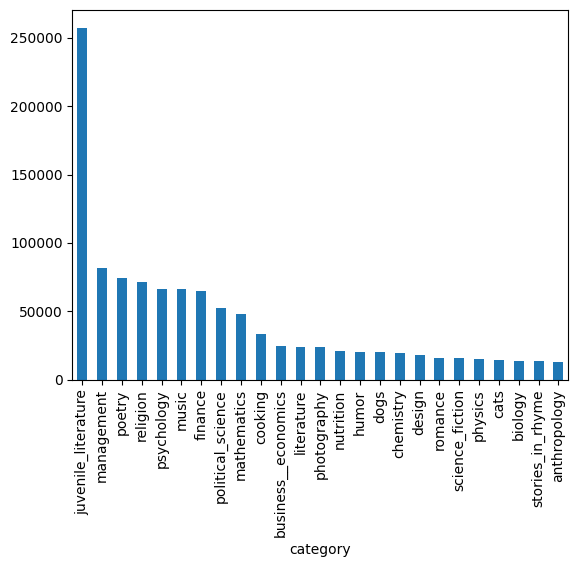

In [192]:
data['category'].value_counts().head(25).plot(kind = 'bar')

#### 4.3) Top 25 authors by number of books published.

<Axes: xlabel='author_id'>

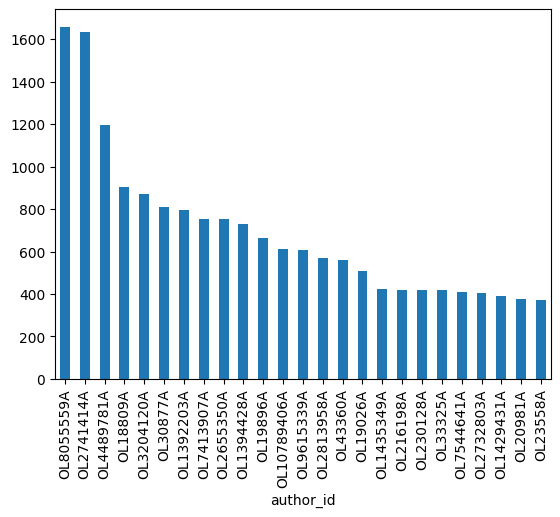

In [193]:
data.groupby('author_id').count()['title_id'].sort_values(ascending = False).head(25).plot(kind = 'bar')

#### 4.4) Yearly trend in books published (earliest → latest).


<Axes: xlabel='publish_year'>

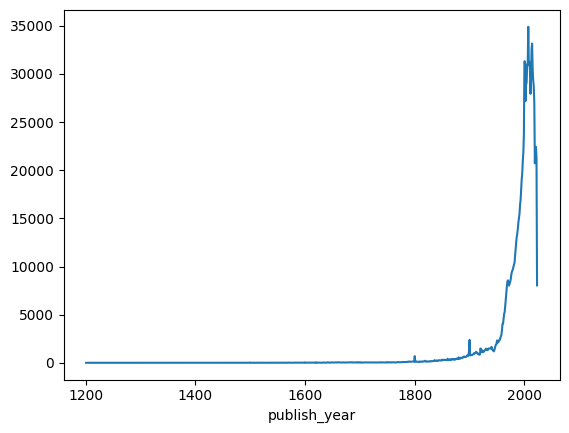

In [194]:
data.groupby('publish_year').count()['title_id'].plot(kind = 'line')

#### 4.5) Top 25 most common book titles.

<Axes: xlabel='title'>

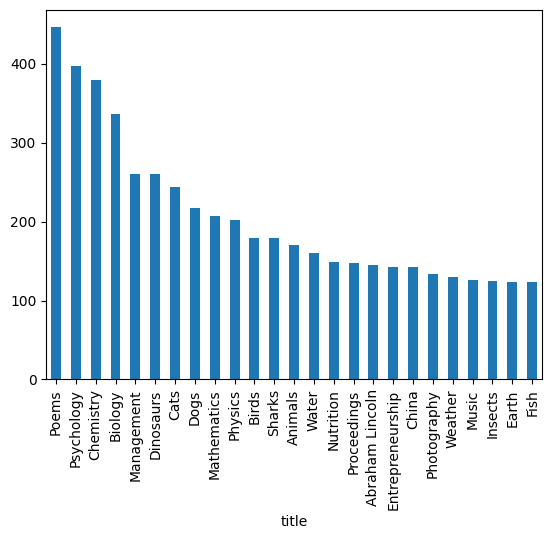

In [195]:
data['title'].value_counts().head(25).plot(kind='bar')

#### 4.6) Top 25 authors by total pages written.

<Axes: xlabel='author_id'>

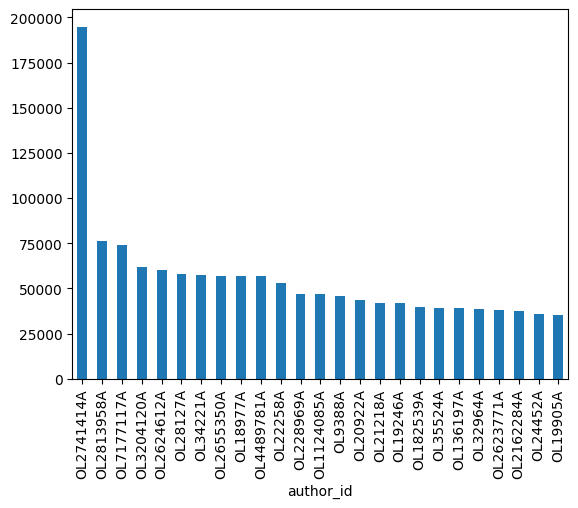

In [196]:
data = data[data['pages'] < 2000]
data.groupby('author_id').sum()['pages'].sort_values(ascending = False).head(25).plot(kind = 'bar')

#### 4.7) Top 25 authors by “want_to_read”, “currently_reading”, and “have_read”.

<Axes: xlabel='author_id'>

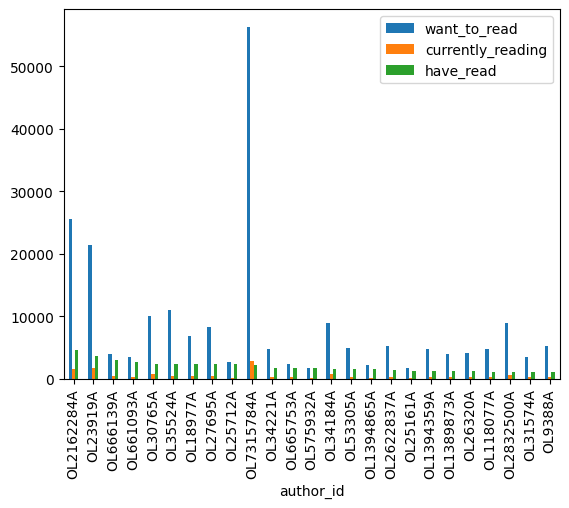

In [197]:
data.groupby('author_id').sum()[['want_to_read', 'currently_reading', 'have_read']].sort_values(by = 'have_read', ascending = False).head(25).plot(kind = 'bar')

